<a href="https://colab.research.google.com/github/unmiulast/Tokyo/blob/main/8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
#重回帰分析
import requests, zipfile
import io

url ='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header = None)

auto.columns =['symboling', 'normalized_losses','make','fuel-type',
               'aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel_base',
               'length','width','height','curb-weight','engine-type','num-of-cylinders','engine_size',
               'fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [3]:
auto

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel_base,...,engine_size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
#目的変数… price
#説明変数… horsepower, width, height
#この4つの変数の中に？がいくつあるかを調べる
columns =['price','horsepower','width','height']
auto[columns].isin(['?']).sum()

,0
price,4
horsepower,2
width,0
height,0


In [5]:
#？をNaNに変換し，NaNの行を削除
columns = ['price','horsepower','width','height']

# '?' を NaN に変換
auto[columns] = auto[columns].replace('?', np.nan)

# NaN を含む行を削除
auto = auto.dropna(subset=columns)

auto


,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel_base,...,engine_size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
#データ型の確認
auto.dtypes

,0
symboling,int64
normalized_losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel_base,float64


In [7]:
#priceとhorsepowerがobject(not数値型)なので変換する
columns =['price','horsepower','width','height']
auto[columns] = auto[columns].astype(float)
auto.dtypes

/tmp/ipython-input-3868975639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto[columns] = auto[columns].astype(float)


,0
symboling,int64
normalized_losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel_base,float64


In [8]:
#説明変数どうしの相関をチェック
auto[columns].corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


widthとhorsepowerの相関がやや高い

相関の高い変数を同時に重回帰分析の説明変数に使用すると多重共線性が生じる可能性がある

多重共線性とは多重共線性とは変数間の高い相関のために，回帰係数の分散が大きくなり，係数の優位性が失われる現象


In [9]:
#データ分割のためのインポート
from sklearn.model_selection import train_test_split

#重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

#目的変数にprice,説明変数に3つを指定
columns = ['width','horsepower','height']
X = auto[columns]
y = auto['price']

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.5, random_state = 0)

#重回帰クラスの初期化と学習
model = LinearRegression()

#model.fit(X_train, y_train) で作られるモデルは1つだけです。
model.fit(X_train, y_train)

print('決定係数(train)',model.score(X_train,y_train))
print('決定係数(test)',model.score(X_test,y_test))

print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index = X.columns)))
print('切片:',model.intercept_)

# 回帰係数を Series で表示
#coef = pd.Series(model.coef_, index=X.columns)
#print("\n回帰係数\n", coef)

# 切片も確認したい場合
#print("\n切片\n", model.intercept_)


決定係数(train) 0.7333575683901374
決定係数(test) 0.7370688738125762

回帰係数
width         1829.174506
horsepower      81.651078
height         229.510077
dtype: float64
切片: -128409.04630338564


In [10]:
columns = ['width','engine_size']
auto[columns].isin(['?']).sum()

,0
width,0
engine_size,0


In [11]:
auto[columns].isnull().sum()

,0
width,0
engine_size,0


In [12]:
#step1.モデル構築のため，インスタンスを作成する

model = LinearRegression()

#step2. 説明変数X,目的変数yに分ける

X = auto[columns]
y = auto['price']

#step3. 訓練データとテストデータに分ける

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

#test4. モデルの学習

model.fit(X_train, y_train)

#test5. テストデータで確かめる

model.score(X_test, y_test)

print('決定係数(train)',model.score(X_train,y_train))
print('決定係数(test)',model.score(X_test,y_test))

coef = pd.Series(model.coef_, index = X.columns)
print('回帰係数\n',coef)
print('切片', model.intercept_)


決定係数(train) 0.8059204635672288
決定係数(test) 0.7662755800781536
回帰係数
 width          1215.972320
engine_size     113.975409
dtype: float64
切片 -81731.85309483178


In [13]:
#ロジスティック回帰

url ='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

adult = pd.read_csv(io.StringIO(res.decode('utf-8')),header = None)

adult.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                 'relationship','race','sex','capital-gain','capital-loss',
                 'hours-per-week','native-country','flg-50K']
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
adult.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [15]:
adult.groupby('flg-50K').size()

,0
flg-50K,
<=50K,24720
>50K,7841


In [16]:
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x == ' >50K' else 0)
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K,fin_flg
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 0)

model = LogisticRegression()
model.fit(X_train, y_train)

print('正解率(train)',model.score(X_train,y_train))
print('正解率(test)',model.score(X_test,y_test))

正解率(train) 0.7957002457002457
正解率(test) 0.7991523862170629


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


学習が収束していない ことを示す警告

特徴量のスケールがバラバラ

例えば age は 0–100、income は数万など

ロジスティック回帰はスケールに敏感なので標準化が必要

データが大きすぎる／多すぎる特徴量

デフォルトの max_iter=100 では収束しきれない

学習データが線形分離されていない

ほぼ分離可能な場合も、収束が遅くなることがあります


In [18]:
model.coef_

array([[-5.624e-03, -3.846e-06, -3.642e-02,  3.286e-04,  7.666e-04]])

In [19]:
np.exp(model.coef_)

array([[0.994, 1.   , 0.964, 1.   , 1.001]])

In [20]:
#説明変数の標準化
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 0)

#標準化処理
sc = StandardScaler()

#学習データに基づいて平均と標準偏差を計算
sc.fit(X_train)

#データを標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, y_train)

print('正解率(train)',model.score(X_train_std,y_train))
print('正解率(test)',model.score(X_test_std,y_test))

正解率(train) 0.8105651105651106
正解率(test) 0.8102082181684171


In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [22]:
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, stratify = cancer.target,random_state = 0)

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = LogisticRegression()
model.fit(X_train_std, y_train)
print(model.score(X_test_std,y_test))

0.958041958041958


In [23]:
#ラッソ回帰・リッジ回帰
#重回帰に比べ，過学習が起こりにくい
auto

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel_base,...,engine_size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800,26,27,22470.0


In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

columns = ['width','horsepower','height']
X = auto[columns]
y = auto['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 0)

#重回帰とリッジ回帰の比較

linear = LinearRegression()
ridge = Ridge(random_state = 0)

for model in[linear, ridge]:
  model.fit(X_train,y_train)
  print('{}(train):{:.6f}'.format(model.__class__.__name__, model.score(X_train,y_train)))
  print('{}(test):{:.6f}'.format(model.__class__.__name__, model.score(X_test,y_test)))

LinearRegression(train):0.733358
LinearRegression(test):0.737069
Ridge(train):0.733355
Ridge(test):0.737768


testデータではRidgeの方が良くなっているのは正則化による効果

In [25]:
columns = ['width','engine_size']

X = auto[columns]
y = auto['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 0)

model = Ridge(alpha = 200.0, random_state = 0)

model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.7761271390872798


In [26]:
#決定木
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)

mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing',
                    'gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring',
                    'stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type',
                    'veil_color','ring_number','ring_type','spore_print_color','population','habitat']

mushroom

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [27]:
mushroom.isnull().sum()

,0
classes,0
cap_shape,0
cap_surface,0
cap_color,0
odor,0
bruises,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [28]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']],dtype = int)
mushroom_dummy

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)
mushroom_dummy

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,flg
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [30]:
#エントロピー：不純度の指標
#毒キノコか否かの識別の状態を表す指標
#不純度が高いとはカテゴリ識別ができていない状態

#cap_colorがcかどうかと毒キノコがどれだけあるのかをクロス集計
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


どちらにも一定の割合で毒キノコが含まれるので，毒キノコを見分けるのにあまり役立たなそう


In [31]:
pd.crosstab(mushroom_dummy['cap_color_c'], mushroom_dummy['flg'])


flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [32]:
pd.crosstab(mushroom_dummy['gill_color_b'],mushroom_dummy['flg'])

flg,0,1
gill_color_b,,
0,4208,2188
1,0,1728


gill_color_bの方が識別能力の高い（不純度の低い識別を導く）有益な条件だと分かる


In [33]:
#決定木とは，多数の変数の中からどの変数が有益な条件分岐を得られるかを見分けてくれるアルゴリズム
#その優劣を決めるのに不純度が使われている
#その1つの指標がエントロピー
#毒キノコとそれ以外が等しい割合(0.5)とすると

-(0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

np.float64(1.0)

データの乱雑さが最大のとき，エントロピーは1.0


In [34]:
#毒キノコの割合が0.999のとき

-(0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

np.float64(0.011407757737461138)

0.0に近づけば識別がよくできている状態

In [35]:
#カテゴリが2分類のためエントロピーの式は
def calc_entropy(p):
  return -(p*np.log2(p) + (1-p)*np.log2(1-p))

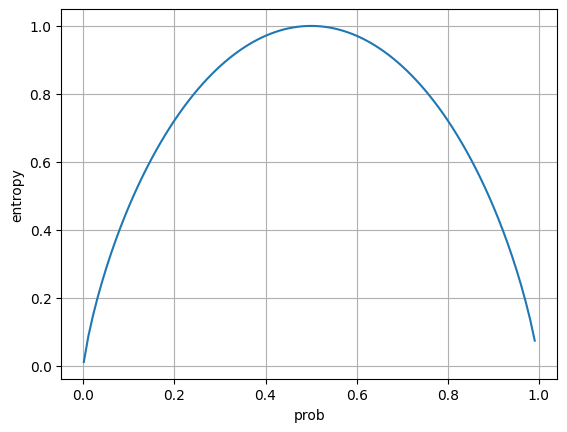

In [36]:
#pを0.001から0.999まで0.01刻みで動かす
p = np.arange(0.001,0.999,0.01)

plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [37]:
mushroom_dummy['flg'].value_counts()

,count
flg,
0,4208
1,3916


In [38]:
4208/8124

0.518

In [39]:
entropy_init = -(0.518*np.log2(0.518) + 0.482*np.log2(0.482))
print('毒キノコデータの初期値:',entropy_init)

毒キノコデータの初期値: 0.9990649315776107


In [40]:
#情報利得(ある変数を使ってデータを分割した前後でどれだけエントロピーが減少したかを表す指標）
#どの変数を分岐に用いたら不純度を小さくできるのか)
pd.crosstab(mushroom_dummy['cap_color_c'], mushroom_dummy['flg'])

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [41]:
#cap_colorがcじゃないときのエントロピー
p1 = 4176/(4176+3904)
p2 = 1-p1

entropy_c0 = -(p1*np.log2(p1) + p2*np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


In [42]:
#cap_colorがcのときのエントロピー
p1 = 32/(32+12)
p2 = 1-p1

entropy_c1 = -(p1*np.log2(p1) + p2*np.log2(p2))
print('entropy_c1: {:.3f}'.format(entropy_c1))

entropy_c1: 0.845


In [43]:
entropy_after = (4176+3904)/8124*entropy_c0 +(32+12)/8124 *entropy_c1
print('データ分割後の平均エントロピー: {:.3f}'.format(entropy_after))

データ分割後の平均エントロピー: 0.998


情報利得はデータ分割後のエントロピーの差として，0.001と分かりエントロピーの減少は小さくそれほど有益な情報でないと分かる

In [44]:
print('cap_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

cap_colorの分割によって得られる情報利得: 0.001


In [45]:
pd.crosstab(mushroom_dummy['gill_color_b'],mushroom_dummy['flg'])

flg,0,1
gill_color_b,,
0,4208,2188
1,0,1728


In [46]:
#gill_colorがbでないときのエントロピー
p1 = 4208/(4208 +2188)
p2 = 1-p1

entropy_b0 = -(p1*np.log2(p1) + p2*np.log2(p2))

#gill_colorがbのときのエントロピー
p1 = 0 /(0+1728)
p2 = 1-p1

entropy_b1 = -(p2*np.log2(p2))

entropy_after = (4208+2188)/8124 * entropy_b0 + (0+1728)/8124 *entropy_b1

print('gill_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init -entropy_after))

gill_colorの分割によって得られる情報利得: 0.269


In [47]:
mushroom_dummy

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,flg
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = mushroom_dummy.drop('flg', axis = 1)
y = mushroom_dummy['flg']

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.5, random_state = 0)

model = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, random_state = 0)
model.fit(X_train,y_train)

print('正解率(train): {:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test,y_test)))

正解率(train): 0.879
正解率(test): 0.891


In [49]:
!pip install pydotplus

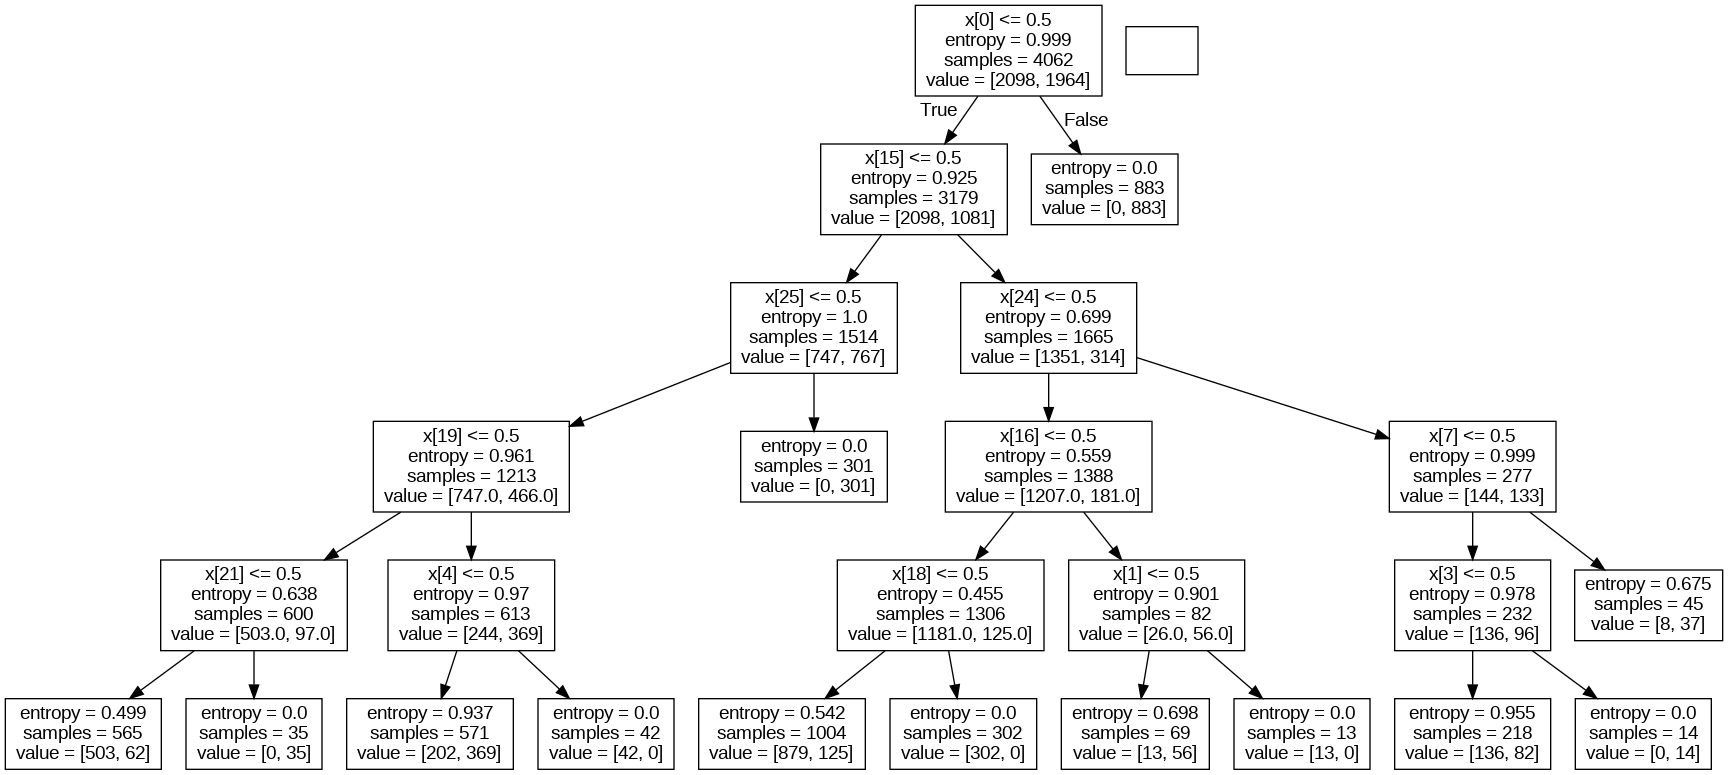

In [50]:
from sklearn import tree
import pydotplus
from io import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file = dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [51]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [52]:
X = cancer.data
y = cancer.target

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.5,random_state = 0)

model = DecisionTreeClassifier(criterion='entropy',max_depth = 5,random_state = 0)
model.fit(X_train,y_train)

print('正解率(train): {:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test,y_test)))

正解率(train): 1.000
正解率(test): 0.940


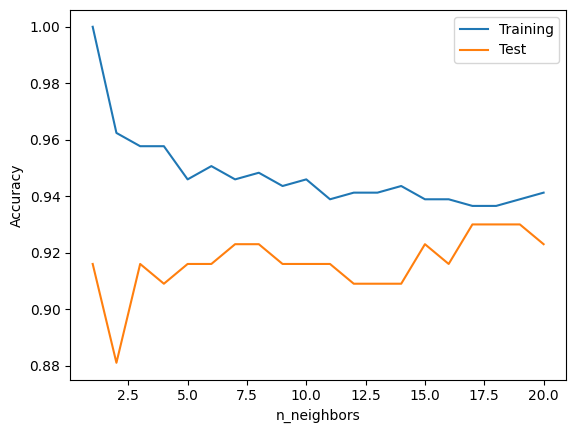

In [53]:
#k-NN(k近傍法)
#あるグループA，Bにどちらに属するのか分からない人が来たとき
#その人と属性が近い人をk人選び，その人たちがA,Bのどちらに多いか調べ
#多い方のグループにするという分類方法

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

#stratifyは層化別抽出（目的変数 y の分布比率が train と test で同じになるように分割されます。）
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

#グラフ描画用のリストを用意
training_accuracy = []
test_accuracy = []

#学習
for n_neighbors in range(1,21):
  model = KNeighborsClassifier(n_neighbors = n_neighbors)
  model.fit(X_train, y_train)
  training_accuracy.append(model.score(X_train,y_train))
  test_accuracy.append(model.score(X_test, y_test))

#グラフ描画
plt.plot(range(1,21),training_accuracy, label = 'Training')
plt.plot(range(1,21),test_accuracy, label ='Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

6~8が適当


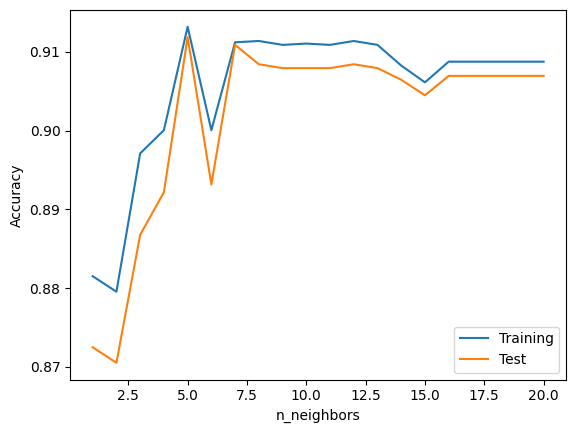

In [56]:
X = mushroom_dummy.drop('flg', axis = 1)
y = mushroom_dummy['flg']

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 50)

train_accuracy = []
test_accuracy = []

for n_neighbors in range(1,21):
  model = KNeighborsClassifier(n_neighbors = n_neighbors)
  model.fit(X_train, y_train)
  train_accuracy.append(model.score(X_train,y_train))
  test_accuracy.append(model.score(X_test,y_test))

plt.plot(range(1,21),train_accuracy, label ='Training')
plt.plot(range(1,21),test_accuracy, label ='Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [58]:
#k-NNの回帰ver.
df = pd.read_csv('/content/student-mat.csv',sep =';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


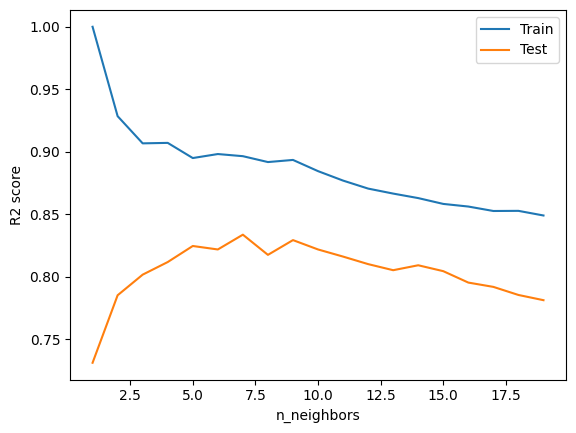

In [61]:
from sklearn.neighbors import KNeighborsRegressor
X = df.loc[:,['age','Medu','Fedu','traveltime','studytime','failures',
              'famrel','freetime','goout','Dalc','Walc','absences','G1','G2']].values
y = df['G3']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

train_score = []
test_score = []

for n_neighbors in range(1,20):
  model = KNeighborsRegressor(n_neighbors = n_neighbors)
  model.fit(X_train,y_train)
  train_score.append(model.score(X_train,y_train))
  test_score.append(model.score(X_test,y_test))

plt.plot(range(1,20),train_score,label = 'Train')
plt.plot(range(1,20),test_score,label = 'Test')
plt.xlabel('n_neighbors')
plt.ylabel('R2 score')
plt.legend()

In [62]:
#サポートベクターマシン(SVM)
#カテゴリを識別する境界線をマージン（最も境界に近い点との距離）が最大になるように引く手法

from sklearn.svm import LinearSVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify =cancer.target, random_state = 0)

model = LinearSVC(random_state = 0)
model.fit(X_train, y_train)

print('正解率(train): {:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test,y_test)))

正解率(train): 0.972
正解率(test): 0.937


In [63]:
#標準化するとスコアが改善されることあり
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify =cancer.target, random_state = 0)

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LinearSVC(random_state = 0)
model.fit(X_train_std,y_train)

print('正解率(train): {:.3f}'.format(model.score(X_train_std,y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test_std,y_test)))

正解率(train): 0.993
正解率(test): 0.951


In [66]:
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify =cancer.target, random_state = 50)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel ='rbf', random_state = 0, C=2)
model.fit(X_train_std, y_train)
print('正解率(train): {:.3f}'.format(model.score(X_train_std,y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test_std,y_test)))

正解率(train): 0.988
正解率(test): 0.986


In [67]:
from sklearn.datasets import load_iris

df = load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [74]:
X_train,X_test,y_train,y_test = train_test_split(df.data,df.target,stratify = df.target, random_state = 0)

model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 0)
model.fit(X_train,y_train)

print('正解率(train): {:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test): {:.3f}'.format(model.score(X_test,y_test)))

正解率(train): 0.964
正解率(test): 0.947


In [75]:
#ノーフリーランチ(どんなデータに対しても一番いいモデルになるモデルは存在しない)

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,stratify = cancer.target,random_state =0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#複数のモデルの設定
models = {
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(random_state = 0),
    'logistic': LogisticRegression(random_state = 0),
    'svc1': LinearSVC(random_state = 0),
    'svc2': SVC(random_state = 0)
}

#スコアをもつための空の辞書データ
scores = {}

for model_name, model in models.items():
  model.fit(X_train_std, y_train)
  scores[(model_name, 'train')] = model.score(X_train_std, y_train)
  scores[(model_name, 'test')] = model.score(X_test_std, y_test)

#最後にそれぞれのスコア結果を表示
pd.Series(scores).unstack()

,test,train
knn,0.951049,0.978873
logistic,0.958042,0.990610
svc1,0.951049,0.992958
svc2,0.958042,0.992958
tree,0.902098,1.000000
